## PCA with knn

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from numpy import isnan
from sklearn.impute import KNNImputer

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

In [6]:
sns.set_style('darkgrid')

In [7]:
pd.options.display.float_format = '{:,.3f}'.format #show all floats 2 decimals

In [8]:
#φορτωνω το csv αρχειο που εφτιαξα μετα απο ολες τις αλλαγες στο preprocess notebook
data = pd.read_csv('data_prep_no_zv.csv')
data.shape

(1848, 567)

In [9]:
print("Number of null values in dataset: ",data.isnull().values.sum())
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

Number of null values in dataset:  21545
Percentage:  2.056181619673683


In [10]:
#first scale data

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [11]:
#impute with knn

imputer = KNNImputer(n_neighbors=5)
data_scaled = pd.DataFrame(imputer.fit_transform(data_scaled),columns = data_scaled.columns)

In [12]:
#specify components to keep ΕΔΩ ΚΡΑΤΑΩ 2 

from sklearn.decomposition import PCA
pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(data_scaled)

In [13]:
#create a DataFrame that will have the principal component values
#for all samples
principal_data_Df = pd.DataFrame(data=principalComponents_data,
                                columns=['principal component 1',
                                        'principal component 2'])

In [14]:
principal_data_Df.head()

,principal component 1,principal component 2
0,2.969,1.331
1,-2.466,-1.287
2,-0.976,-1.122
3,1.498,-0.695
4,0.420,-0.499


In [15]:
#οριζω τη στηλη με τισ κλασεις, με βαση την οποια θα γινει ο διαχωρισμος
principal_data_Df['y'] = data_scaled['G21']

In [16]:
#για να βρω τον αριθμο των χρωματατων που πρεπει να βαλω
data['G21'].value_counts()

0.000    1553
1.000     217
2.000      78
Name: G21, dtype: int64

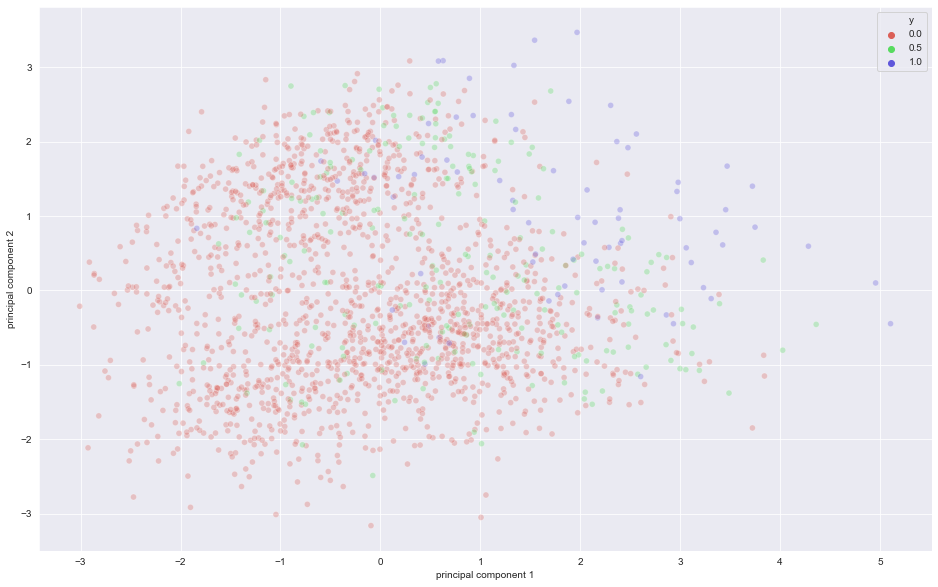

In [17]:
#pca με βαση το G21 που ειναι η Clinical Diagnosis για αννοια κλπ νευρολογικα

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls",3),
    data=principal_data_Df,
    legend="full",
    alpha = 0.3
    
)

In [18]:
# ΕΔΩ ΚΡΑΤΑΩ 3 principal components 

from sklearn.decomposition import PCA
pca_data = PCA(n_components=3)
principalComponents_data = pca_data.fit_transform(data_scaled)

In [19]:
principal_data_Df = pd.DataFrame(data=principalComponents_data,
                                columns=['principal component 1',
                                        'principal component 2','principal component 3'])

In [20]:
principal_data_Df['y'] = data['G21']

In [21]:
#το 3d scatter θελει array για να δουλεψει
x=np.array(principal_data_Df['principal component 1'])
y=np.array(principal_data_Df['principal component 2'])
z=np.array(principal_data_Df['principal component 3'])
hue=np.array(principal_data_Df['y'])

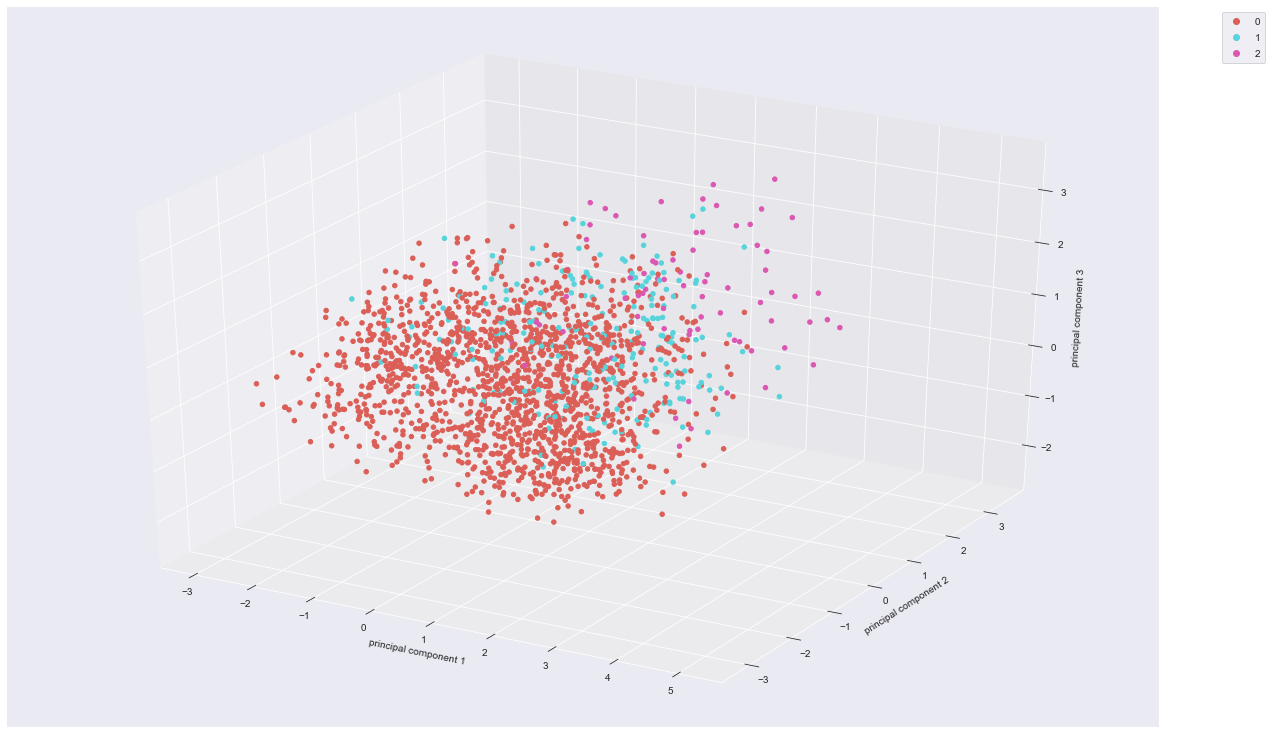

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)
cmap = ListedColormap(sns.color_palette("hls",8).as_hex())

sc = ax.scatter(x, y, z, s=20, c=hue, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)